In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

Dataset

In [2]:
x,y = make_regression(n_samples=100, n_features=1, noise=10)

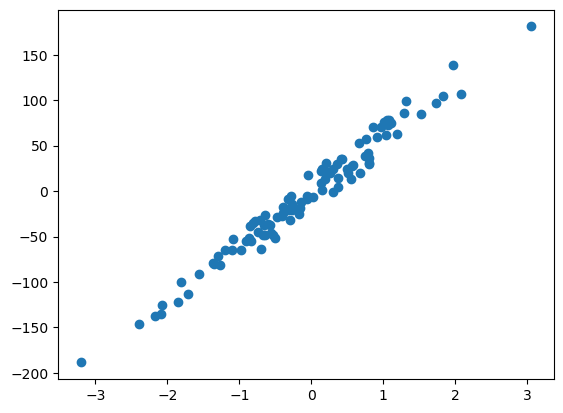

In [3]:
plt.scatter(x,y)
plt.show()

Verification de la dimension de la matrice!

In [6]:
print(x.shape)
y= y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [7]:
#Créatio de la matrice X en ajoutant une colonne de 1 pour le biais
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [8]:
X

array([[-0.29580862,  1.        ],
       [ 1.11088662,  1.        ],
       [ 0.02270679,  1.        ],
       [ 1.72896424,  1.        ],
       [-0.8524265 ,  1.        ],
       [-0.58073738,  1.        ],
       [-1.09392909,  1.        ],
       [ 0.13136579,  1.        ],
       [ 0.37323141,  1.        ],
       [-0.78928706,  1.        ],
       [-1.29938635,  1.        ],
       [-1.27085665,  1.        ],
       [ 0.50983808,  1.        ],
       [ 0.58443994,  1.        ],
       [ 0.13081485,  1.        ],
       [-0.31874212,  1.        ],
       [ 0.74310776,  1.        ],
       [-0.48253062,  1.        ],
       [-0.40850696,  1.        ],
       [ 1.19537652,  1.        ],
       [ 0.80639016,  1.        ],
       [ 0.42525879,  1.        ],
       [-0.97962662,  1.        ],
       [-0.81094315,  1.        ],
       [-0.69351343,  1.        ],
       [-0.32552758,  1.        ],
       [-1.81172351,  1.        ],
       [-0.71129953,  1.        ],
       [-0.14772787,

In [9]:
theta = np.random.randn(2,1)
print(theta)

[[-0.15150082]
 [-0.31147829]]


Modèle

In [11]:
def model(X, theta):
    return X.dot(theta) 

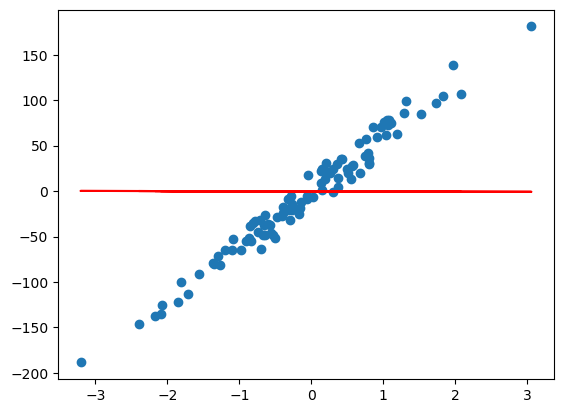

In [14]:
plt.scatter(x,y)
plt.plot(x, model(X, theta), color='red')
plt.show()

Fonction coût

In [15]:
def cost_function(X, y, theta):
    m = len(y)
    predictions = model(X, theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

In [16]:
cost_function(X, y, theta)

2108.31801226292

Gradients et Descente de Gradient

In [17]:
def grad(X, y, theta):
    m = len(y)
    predictions = model(X, theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

In [18]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    
    return theta, cost_history

Machine learning

In [19]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000)
print("Theta final:", theta_final)

Theta final: [[60.55882447]
 [-0.08735812]]


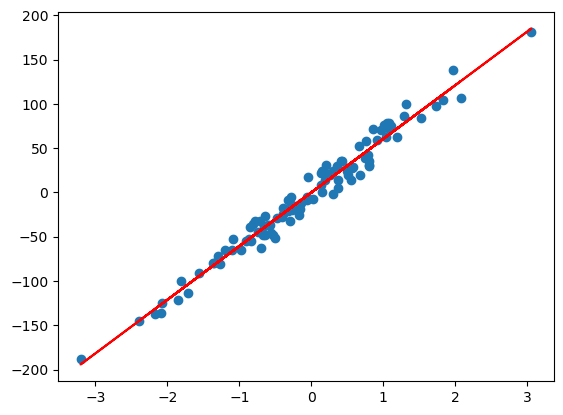

In [21]:
Predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, color='red')
plt.show()

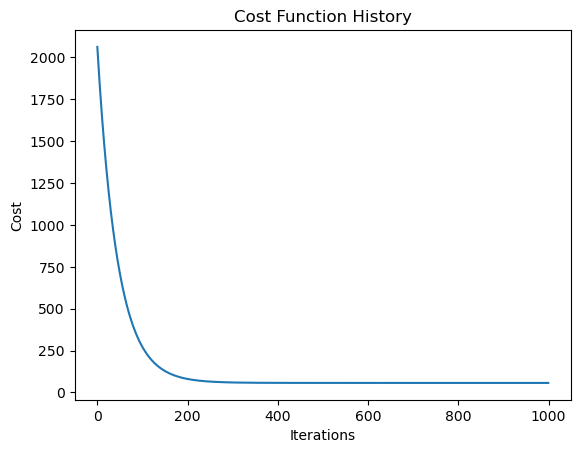

In [22]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

On pourra faire juste 400 itterations!